#### Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

### Importing Dependencies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Collection and Pre-Processing

In [3]:
data =pd.read_csv("spam.csv")
data.head(5)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#missing values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
# check for duplicate values
data.duplicated().sum()

415

In [8]:
#remove duplicates
data = data.drop_duplicates(keep="first")

In [9]:
# check for duplicate values
data.duplicated().sum()

0

In [10]:
data.shape

(5157, 2)

In [14]:
data["Category"].value_counts()

0    4516
1     641
Name: Category, dtype: int64

([<matplotlib.patches.Wedge at 0x24fdb6ffb90>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

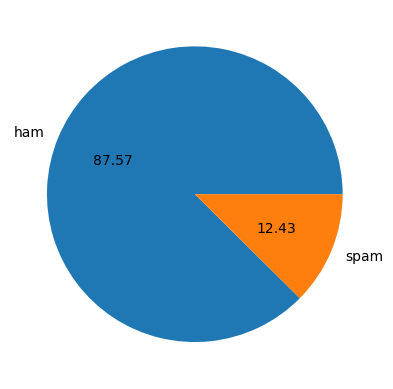

In [15]:
plt.pie(data["Category"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

### Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
data["Category"]=encoder.fit_transform(data["Category"])

In [13]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# seprating data as texts and label
X= data["Message"]
Y= data["Category"]

In [19]:
print(X)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [21]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32


In [24]:
#splitting Training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [25]:
X.shape,X_train.shape,X_test.shape

((5157,), (4125,), (1032,))

In [32]:
# transform the text data to feature vectors that can be used as input to the logistic regression

feature_extraction = TfidfVectorizer(min_df =1, stop_words ="english" , lowercase= True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [33]:
# convert train and test values as integers
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

### Model Training

In [34]:
model= LogisticRegression()

In [35]:
model.fit(X_train_features,Y_train)

LogisticRegression()

### Model Evaluation

In [37]:
# prediction on training data

pred_train=model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train,pred_train)
print("Accuracy on training data: ",accuracy_train)

Accuracy on training data:  0.961939393939394


In [38]:
# prediction on test data

pred_test=model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test,pred_test)
print("Accuracy on test data: ",accuracy_test)

Accuracy on test data:  0.9544573643410853


#### Predictive System

In [48]:
input = ["Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"]
#convert text data to feature vectors
convert_data = feature_extraction.transform(input)

#making prediction
prediction = model.predict(convert_data)
print(prediction)

if(prediction[0]==0):
    print("Ham mail")
else:
    print("Spam mail")

[1]
Spam


In [49]:
input = ["Oops, I'll let you know when my roommate's done"]
#convert text data to feature vectors
convert_data = feature_extraction.transform(input)

#making prediction
prediction = model.predict(convert_data)
print(prediction)

if(prediction[0]==0):
    print("Ham mail")
else:
    print("Spam")

[0]
Ham mail
